In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Mon Mar  4 19:51:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%cd "/content/drive/MyDrive/Wheat Work/YOLO/yolov8l/"

/content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/YOLO/yolov8l


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [6]:
# Git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

# Downaload the dataset

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="CZ5G1ljy5Egdidv9w210")
project = rf.workspace("albara-shehadeh-o8han").project("wheat-segmentation-nsndq")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Albara-2 in yolov5pytorch:: 100%|██████████| 6868/6868 [00:58<00:00, 117.87it/s]


# Custom Training

In [8]:
%cd "/content/drive/MyDrive/Wheat Work/YOLO/yolov8l"

/content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/YOLO/yolov8l


In [9]:
!yolo task=segment mode=train model="runs/segment/train2/weights/last.pt" data="/content/drive/MyDrive/Wheat Work/Albara-2/data.yaml" epochs=15 imgsz=640

New https://pypi.org/project/ultralytics/8.1.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=runs/segment/train2/weights/last.pt, data=/content/drive/MyDrive/Wheat Work/Albara-2/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, 

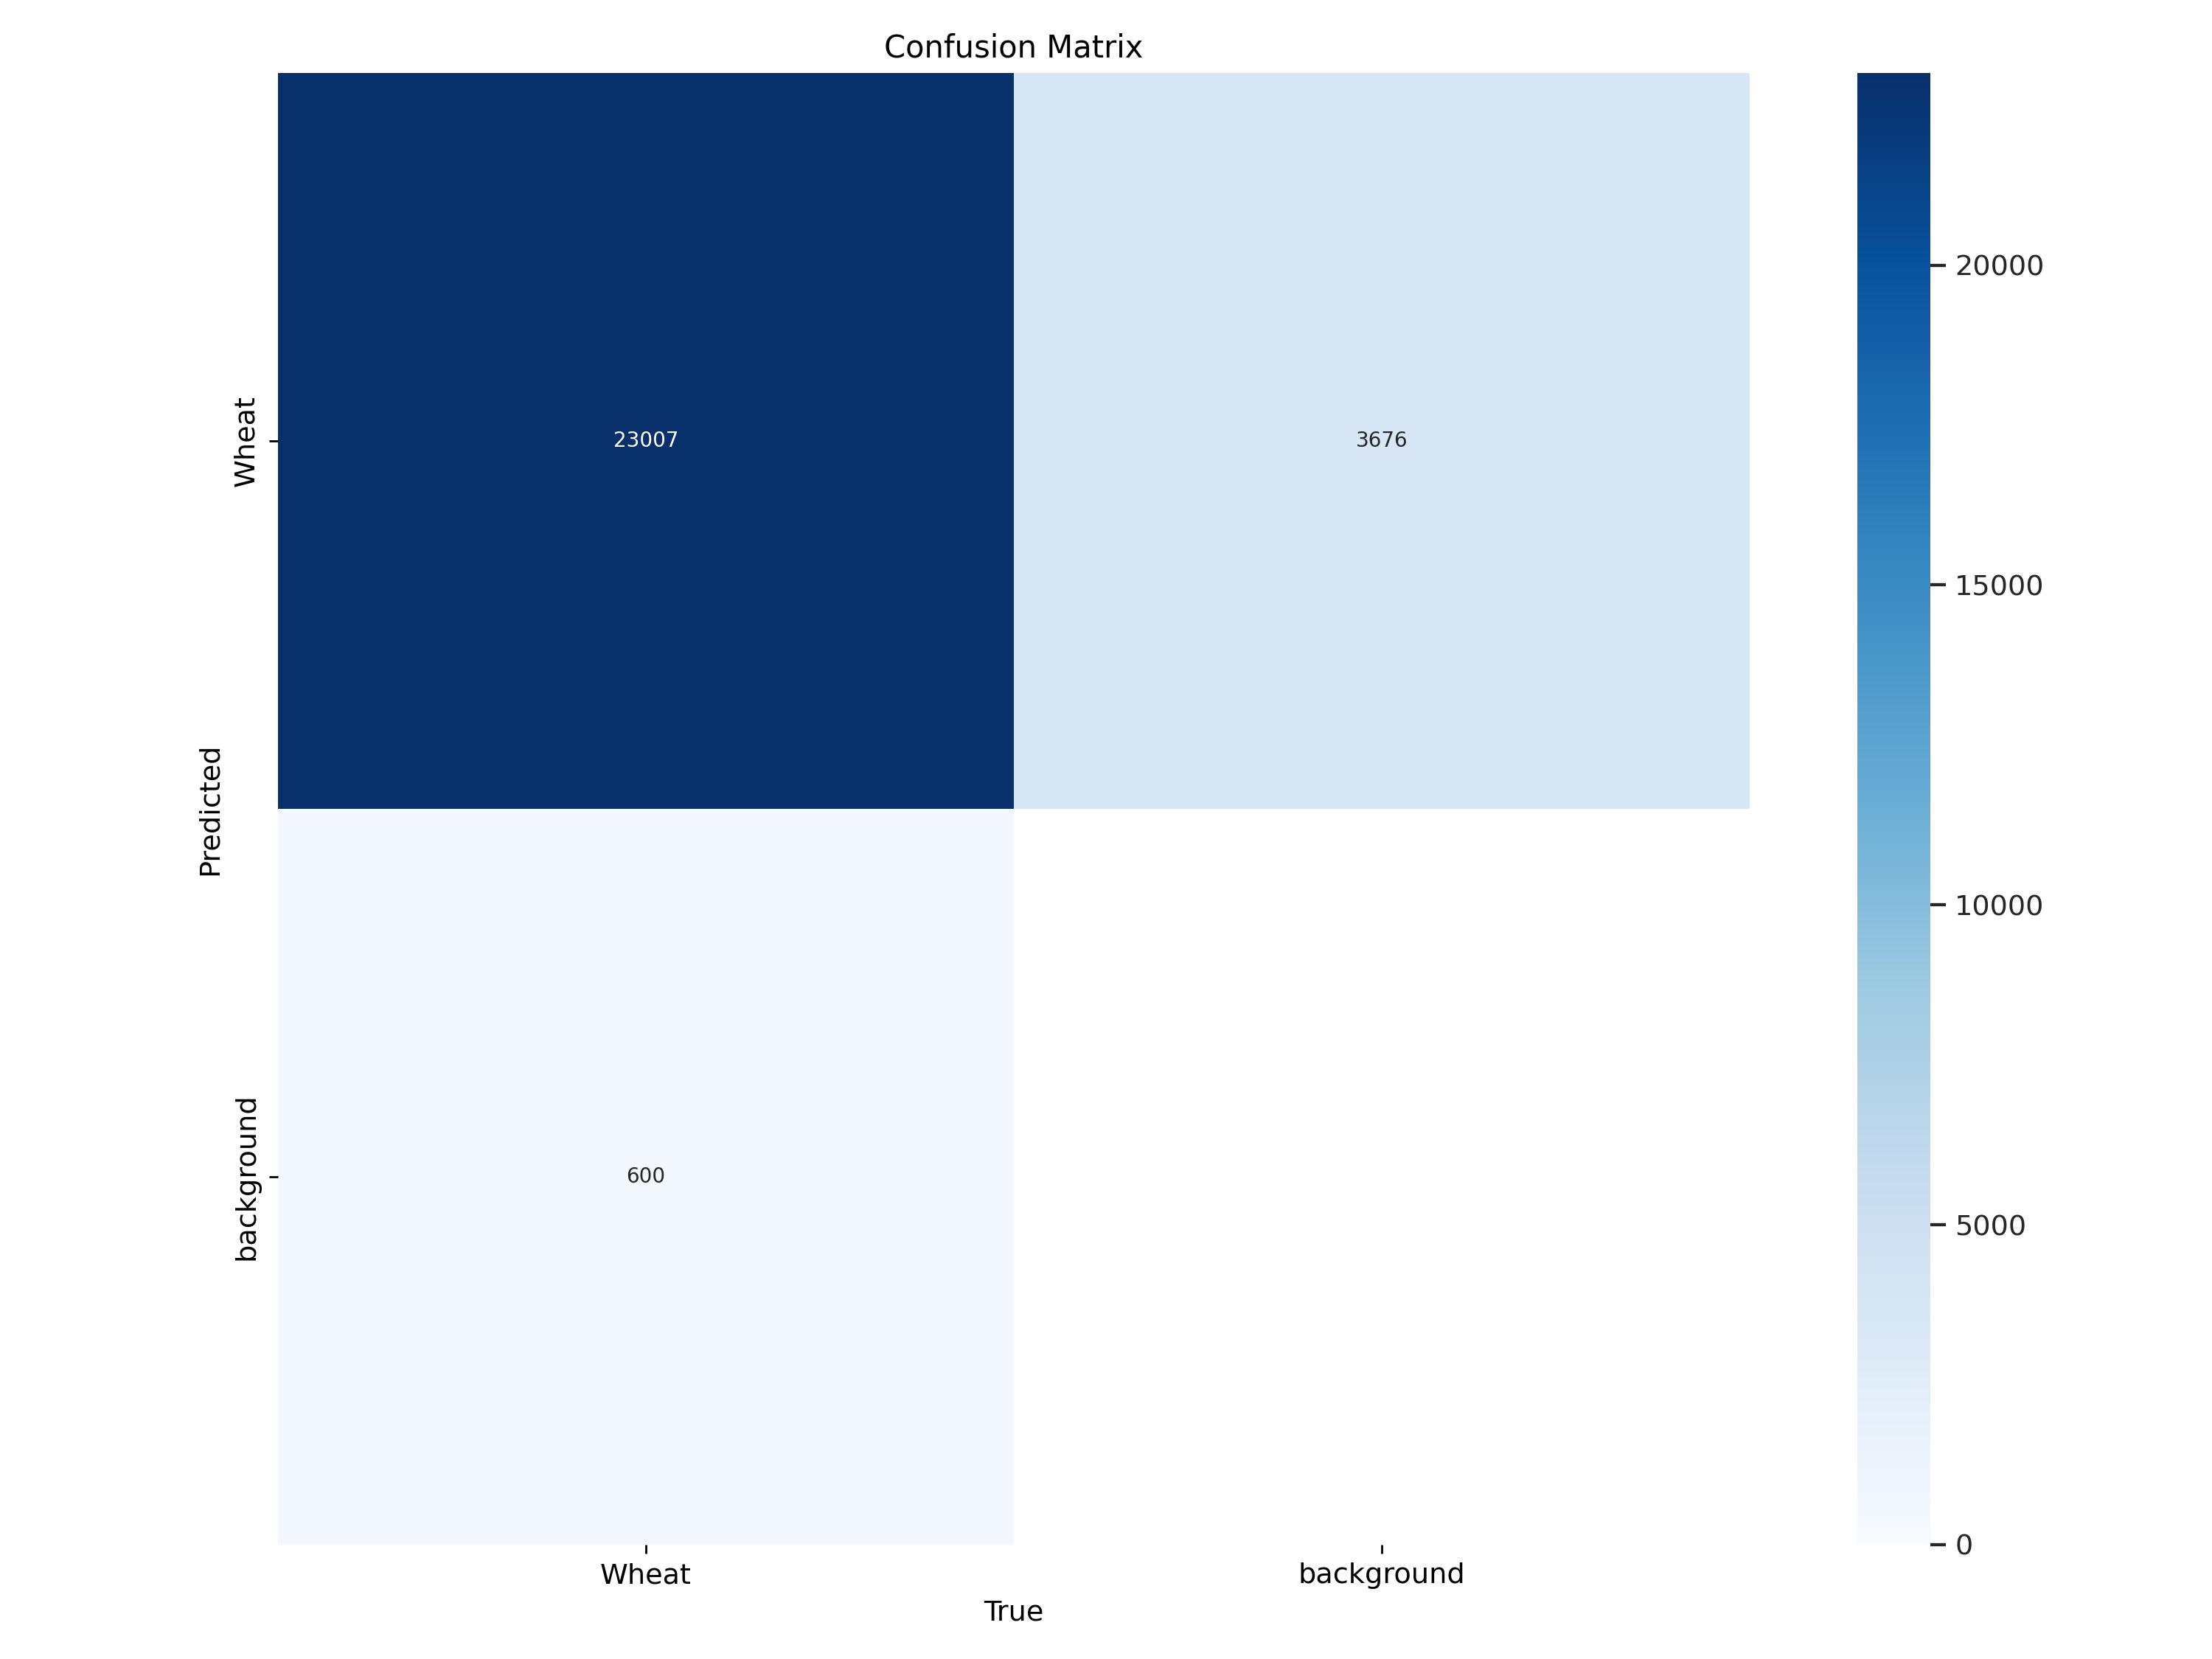

In [10]:
Image(filename='runs/segment/train3/confusion_matrix.png', width=600)

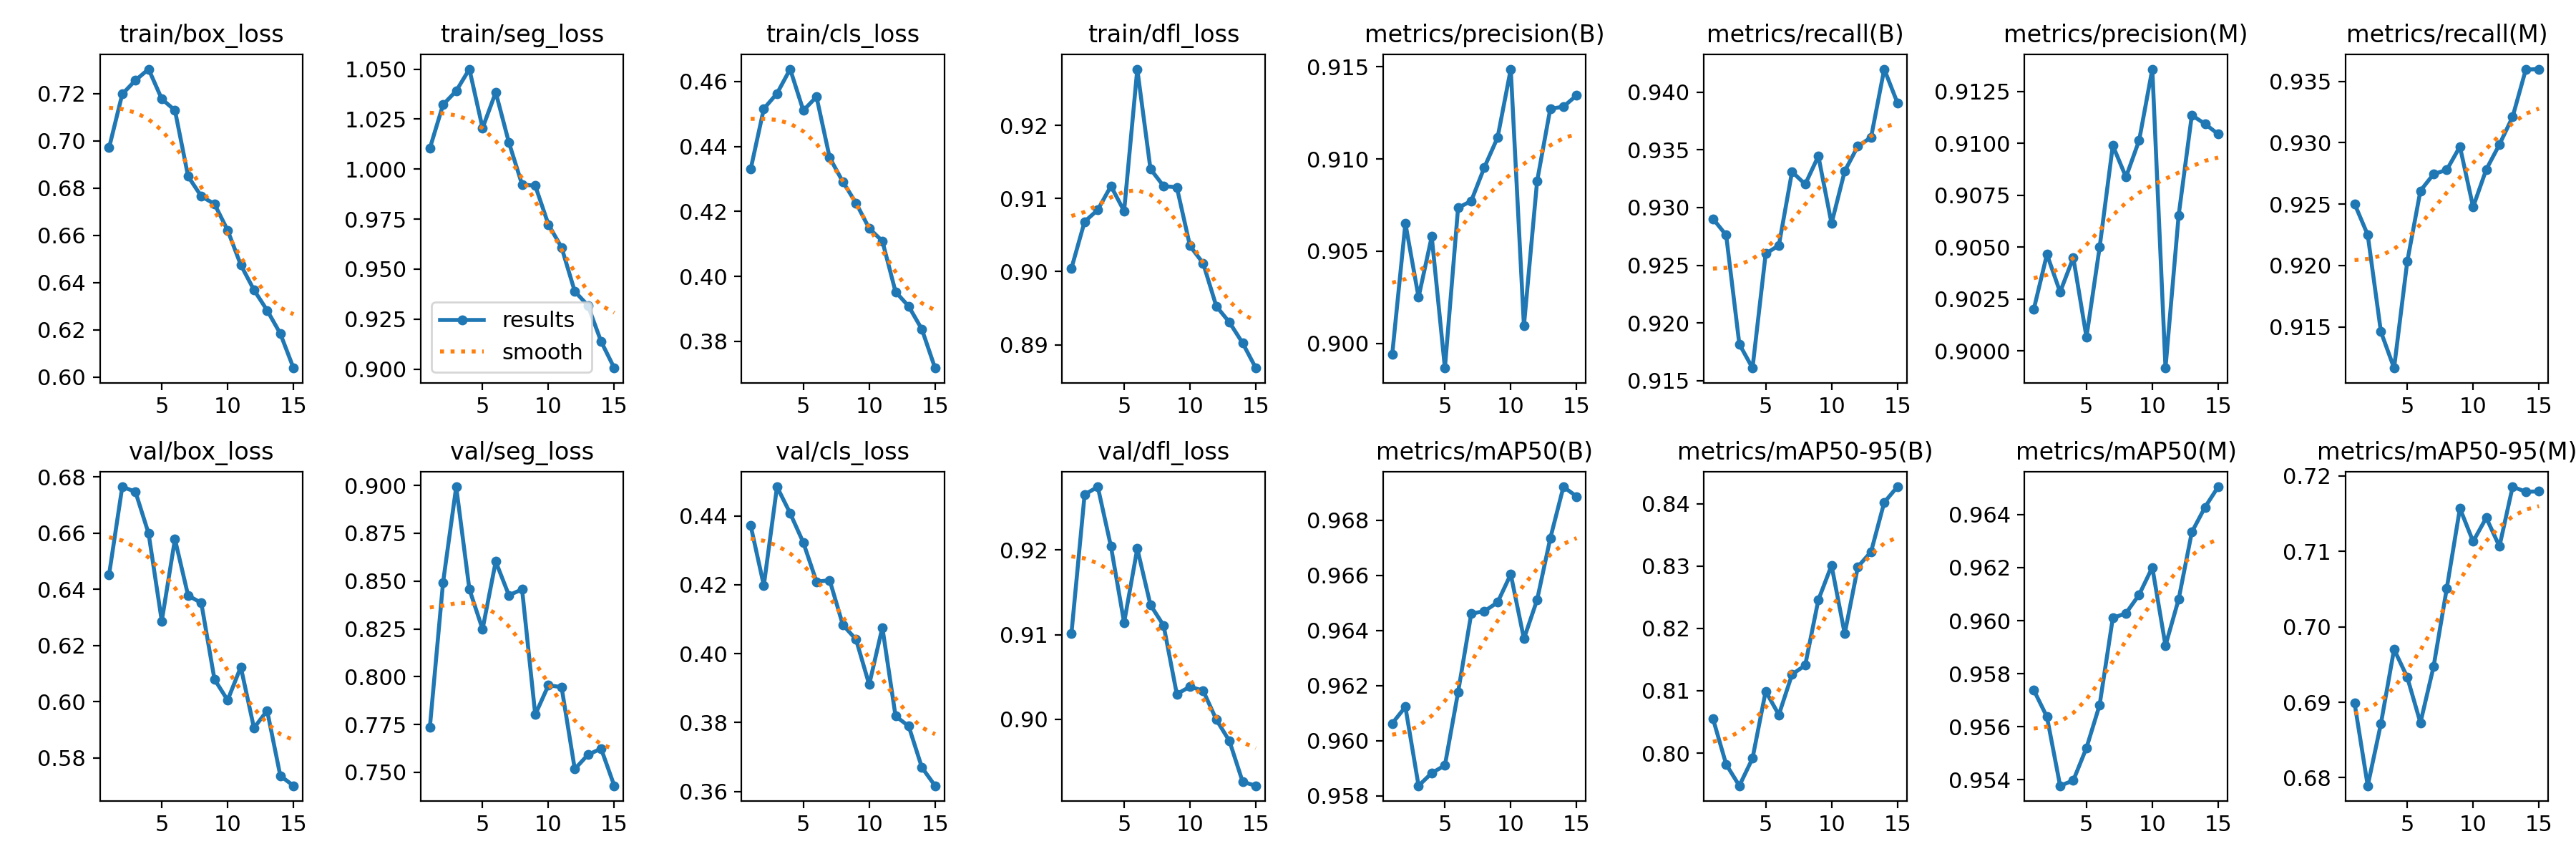

In [11]:
Image(filename='runs/segment/train3/results.png', width=600)

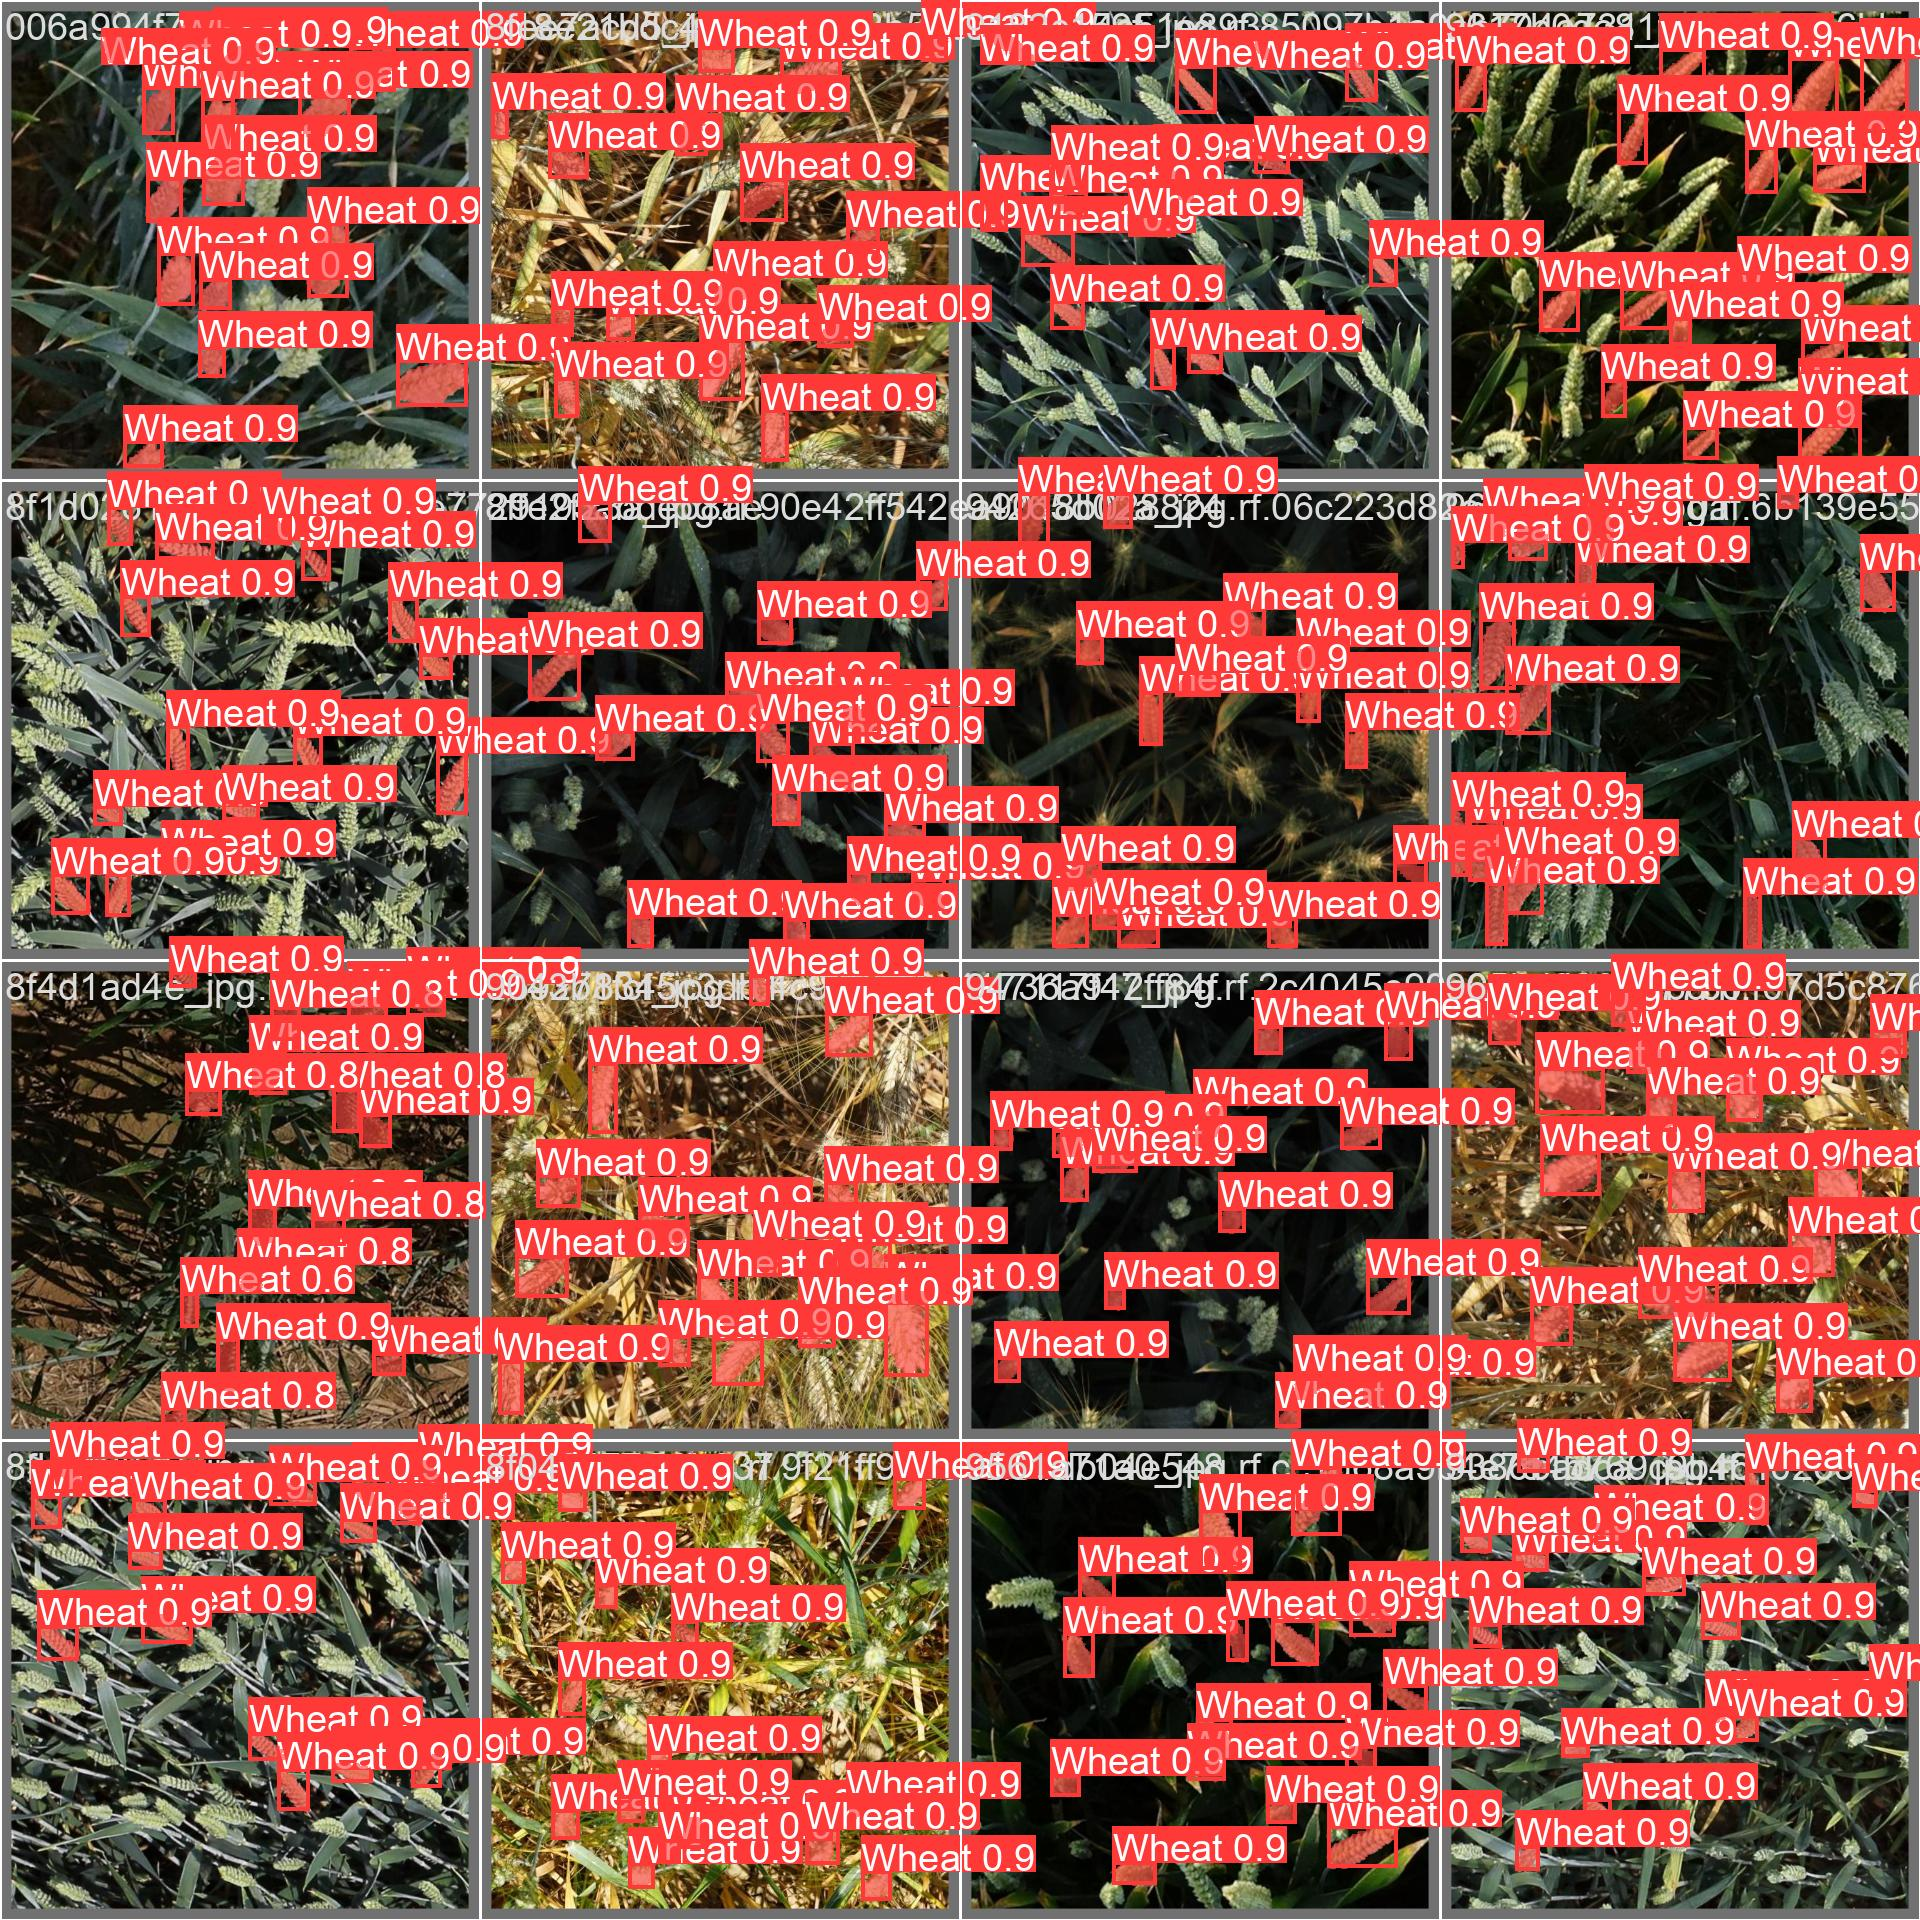

In [12]:
Image(filename='runs/segment/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
!yolo task=segment mode=val model="runs/segment/train3/weights/best.pt" data="/content/drive/MyDrive/Wheat Work/Albara-2/data.yaml"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/Albara-2/valid/labels.cache... 598 images, 5 backgrounds, 0 corrupt: 100% 598/598 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/Albara-2/valid/images/211487419_jpg.rf.3314b85d7a97f81655c0d20f42742d66.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/Albara-2/valid/images/378966871_jpg.rf.ba4a6c325db09a9f43238c351cced1b6.jpg: 16 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 38/38 [00:59<00:00,  1.57s/it]
                   all        598      23607    

## Inference with Custom Model

In [14]:
!yolo task=segment mode=predict model="runs/segment/train3/weights/best.pt" conf=0.25 source="/content/drive/MyDrive/Wheat Work/Albara-2/test/images" save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/2fd875eaa_jpg.rf.855cb3521f6b085bba1af3e785edb52a.jpg: 640x640 29 Wheats, 76.3ms
image 2/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/348a992bb_jpg.rf.faf3ab0b14d044abe9acd4bdab6d6538.jpg: 640x640 37 Wheats, 76.3ms
image 3/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/51b3e36ab_jpg.rf.5fe64e31ac086e3e5845755e37a22690.jpg: 640x640 26 Wheats, 76.2ms
image 4/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/51f1be19e_jpg.rf.d0ef4899aa765a7cbd8de168cb713120.jpg: 640x640 18 Wheats, 76.3ms
image 5/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/53f253011_jpg.rf.28c441bfc9e6143c924f55b0ef8b6c66.jpg: 640x640 32 Wheats, 76.3ms
image 6/10 /content/drive/MyDrive/Wheat Work/A

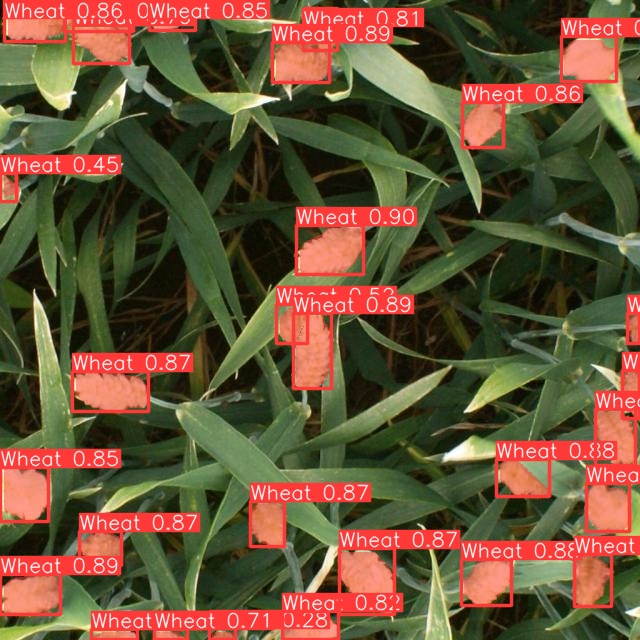

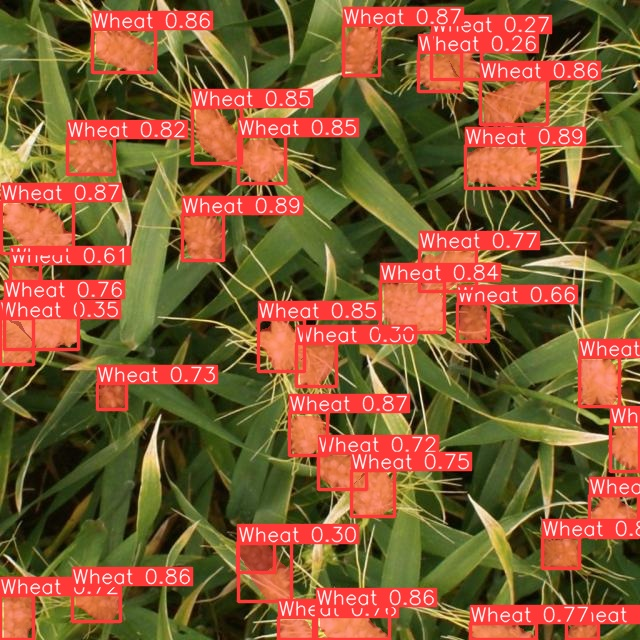

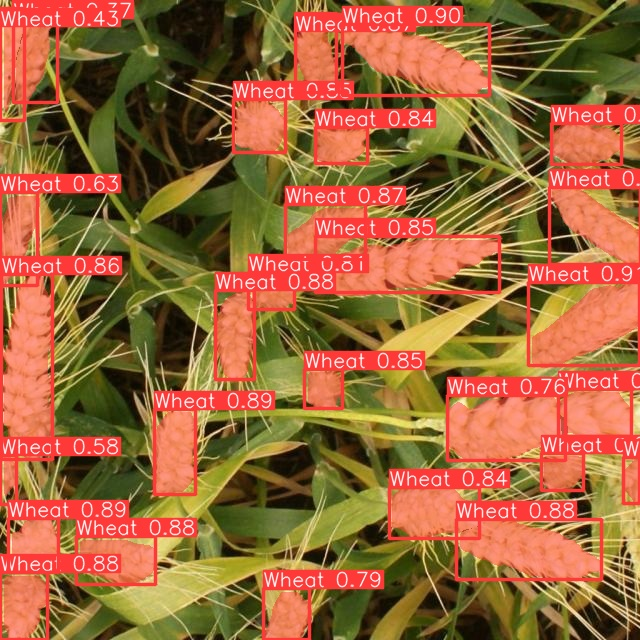

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=400))
      print("\n")

# Export Onnx

In [ ]:
!pip install onnx onnxruntime

In [ ]:
from ultralytics import YOLO

# Load a pretrained model from your disk
model_path = "runs/segment/train2/weights/best.pt"
model = YOLO(model_path)

# Export the loaded model to ONNX format
success = model.export(format="onnx", dynamic=False)  # Set dynamic=True for dynamic shapes

if success:
    print("Model successfully exported to ONNX format.")
else:
    print("Export to ONNX failed. Please check your model and paths.")

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

PyTorch: starting from 'runs/segment/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (88.0 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 9.6s, saved as 'runs/segment/train2/weights/best.onnx' (175.4 MB)

Export complete (28.6s)
Results saved to /content/drive/MyDrive/Wheat Work/YOLO/yolov8l/runs/segment/train2/weights
Predict:         yolo predict task=segment model=runs/segment/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=runs/segment/train2/weights/best.onnx imgsz=640 data=/content/drive/MyDrive/Wheat Work/Albara-2/data.yaml  
Visualize:       https://netron.app


Model successfully exported to ONNX format.


In [ ]:
!yolo task=segment mode=predict model="/content/drive/MyDrive/Wheat Work/YOLO/yolov8l/runs/segment/train2/weights/best.onnx" conf=0.25 source="/content/drive/MyDrive/Wheat Work/Albara-2/test/images" save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/drive/MyDrive/Wheat Work/YOLO/yolov8l/runs/segment/train2/weights/best.onnx for ONNX Runtime inference...

image 1/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/2fd875eaa_jpg.rf.855cb3521f6b085bba1af3e785edb52a.jpg: 640x640 29 Wheats, 3189.1ms
image 2/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/348a992bb_jpg.rf.faf3ab0b14d044abe9acd4bdab6d6538.jpg: 640x640 35 Wheats, 3137.5ms
image 3/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/51b3e36ab_jpg.rf.5fe64e31ac086e3e5845755e37a22690.jpg: 640x640 28 Wheats, 4232.9ms
image 4/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/51f1be19e_jpg.rf.d0ef4899aa765a7cbd8de168cb713120.jpg: 640x640 18 Wheats, 3154.9ms
image 5/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/53f253011_jpg.rf.28c441bfc9e6143c924f55b0ef8b6c66.jpg: 640x640 31 Wheats, 3104.2ms
image 6/10 /content/drive/MyDrive/Wheat Work/A

In [ ]:
# import onnxruntime
# import torch
# import time
# import cv2
# import numpy as np

# # Path to the models
# pt_model_path = "/content/drive/MyDrive/Wheat Work/YOLO/yolov8l/runs/segment/train2/weights/best.pt"
# onnx_model_path = "/content/drive/MyDrive/Wheat Work/YOLO/yolov8l/runs/segment/train2/weights/best.onnx"

# # Load the PyTorch model
# pt_model_dict = torch.load(pt_model_path, map_location=torch.device('cpu'))
# pt_model = pt_model_dict['model']
# pt_model.eval()

# # Load the ONNX model using onnxruntime
# ort_session = onnxruntime.InferenceSession(onnx_model_path)

# # Load an image for inference
# image_path = "/content/drive/MyDrive/Wheat Work/Albara-2/test/images/2fd875eaa_jpg.rf.855cb3521f6b085bba1af3e785edb52a.jpg"
# image = cv2.imread(image_path)

# # Preprocess the image for both models
# input_tensor = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure the image is in RGB format
# input_tensor = np.expand_dims(input_tensor, axis=0)
# input_tensor = input_tensor.astype(np.float32) / 255.0  # Normalize to [0, 1]

# # Run inference for PyTorch model
# start_time = time.time()
# with torch.no_grad():
#     pt_output = pt_model(torch.from_numpy(input_tensor))
# pt_elapsed_time = time.time() - start_time

# # Run inference for ONNX model
# start_time = time.time()
# ort_output = ort_session.run(None, {'images': input_tensor})
# onnx_elapsed_time = time.time() - start_time

# # Print the inference times
# print(f"PyTorch Model Inference Time: {pt_elapsed_time} seconds")
# print(f"ONNX Model Inference Time: {onnx_elapsed_time} seconds")

# # Compare the outputs (optional)
# # Note: You might need to adjust this based on the actual output structure of your models
# assert np.allclose(pt_output.numpy(), ort_output[0], atol=1e-4), "Outputs do not match!"


## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [ ]:
# project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

# Deploy Your Model to the Edge

![Roboflow Inference banner](https://blog.roboflow.com/content/images/2023/08/banner.png)

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.